In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("11Oct-normalised data-Data.csv")
data.head()

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,Cardia_adverse,133b,221-3p,let-7b-5p,130a-3p,206,hsa-miR-654-3p,hsa-miR-16-5p,hsa-miR-20a-5p,hsa-miR-143-3p,...,hsa-miR-let-7e-5p,hsa-miR-129-5p,hsa-miR-205-5p,hsa-miR-497-5p,hsa-miR-214-3p,hsa-miR-199a-3p,hsa-miR-132-3p,hsa-miR-92a-3p,hsa-miR-378a-3p,hsa-miR-99a-5p
0,1,4.898795,-1.398916,2.336982,0.958610,1.862024,3.574644,-2.831999,-1.864063,-1.779026,...,0.286105,10.037741,4.646494,1.164696,2.080123,-1.836956,1.813405,-2.685146,-2.529324,4.098320
1,1,-3.081293,0.176641,4.572735,1.792612,6.028593,5.127210,-3.814917,-0.952137,4.081398,...,3.222984,12.355745,5.266298,9.798261,8.959145,1.561325,4.477083,-1.384653,5.538828,3.179023
2,1,-1.061368,-2.523858,1.877732,0.883168,9.685578,9.697358,-4.317510,-1.634580,1.931748,...,1.403205,9.697358,6.273058,2.125131,9.697358,-1.219484,5.003732,-2.618695,3.539742,9.697358
3,1,2.209047,-0.964138,2.978174,3.093813,1.699160,8.790880,-2.681616,0.938093,0.150238,...,-2.341090,8.790880,2.159155,8.790880,4.235864,0.762869,3.484050,-1.611933,1.545297,4.717610
4,1,7.318370,-0.903080,3.119447,2.195768,7.318370,7.318370,-1.897790,-0.446085,-1.017724,...,7.318370,7.318370,7.318370,7.318370,3.277785,-0.729708,5.199885,-2.868722,-0.617162,5.286721


In [2]:
# Split target and features
X = data.drop(['Cardia_adverse'],axis=1)
X
y = data['Cardia_adverse']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(38, 91)
(38,)


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   133b               38 non-null     float64
 1   221-3p             38 non-null     float64
 2   let-7b-5p          38 non-null     float64
 3   130a-3p            38 non-null     float64
 4   206                38 non-null     float64
 5   hsa-miR-654-3p     38 non-null     float64
 6   hsa-miR-16-5p      38 non-null     float64
 7   hsa-miR-20a-5p     38 non-null     float64
 8   hsa-miR-143-3p     38 non-null     float64
 9   hsa-miR-181c-5p    38 non-null     float64
 10  hsa-miR-147a       38 non-null     float64
 11  hsa-miR-208b-3p    38 non-null     float64
 12  hsa-miR-150-3p     38 non-null     float64
 13  hsa-miR-let-7f-5p  38 non-null     float64
 14  hsa-miR-140-3p     38 non-null     float64
 15  hsa-miR-222-3p     38 non-null     float64
 16  hsa-miR-9-3p       38 non-nu

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [ ]:
## 1- Wrapper Method (RFECV)

In [5]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='roc_auc',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features defined by auc: %d" % rfecv.n_features_)


rfecv2 = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv2.fit(X, y)

print("Optimal number of features defined by accuracy : %d" % rfecv2.n_features_)

Optimal number of features defined by auc: 4
Optimal number of features defined by accuracy : 4


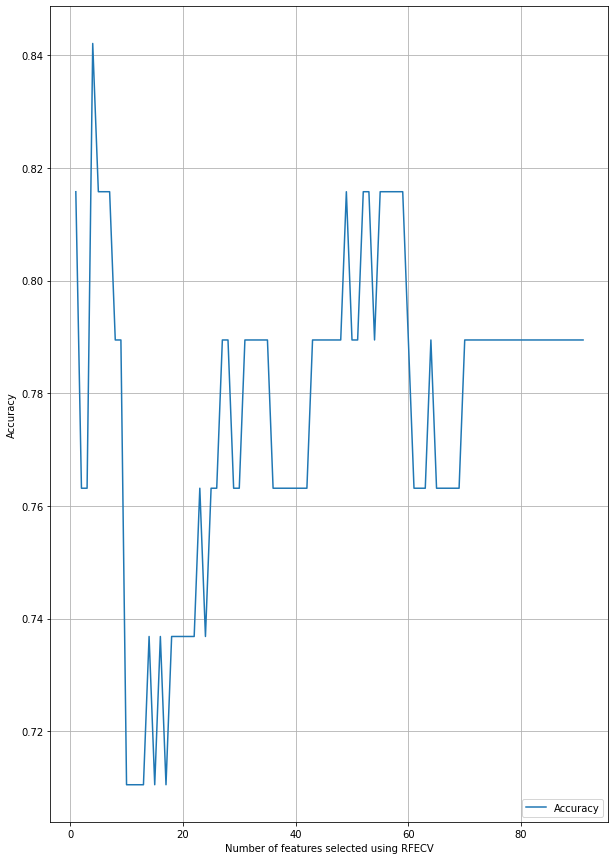

In [32]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using RFECV")
plt.ylabel("Accuracy")

plt.plot(range(min_features_to_select,
               len(rfecv2.grid_scores_) + min_features_to_select),
         rfecv2.grid_scores_, label = 'Accuracy')

# plt.plot(range(min_features_to_select,
#                len(rfecv.grid_scores_) + min_features_to_select),
#          rfecv.grid_scores_, label = 'ROC AUC')


plt.legend(loc='lower right')
plt.grid(True)

plt.show()

In [7]:
print(rfecv.grid_scores_)  # roc_auc scores

[0.91309524 0.9047619  0.90595238 0.93809524 0.9202381  0.84047619
 0.83928571 0.83928571 0.88333333 0.75357143 0.75833333 0.74285714
 0.75       0.78095238 0.76309524 0.7797619  0.81190476 0.81190476
 0.8047619  0.8047619  0.79761905 0.8202381  0.80357143 0.81904762
 0.80714286 0.79880952 0.8        0.80714286 0.80833333 0.78690476
 0.80833333 0.80119048 0.82261905 0.81666667 0.82380952 0.80119048
 0.80119048 0.80833333 0.79404762 0.83214286 0.84880952 0.84166667
 0.84166667 0.84166667 0.83333333 0.82619048 0.82619048 0.83333333
 0.82619048 0.83452381 0.84285714 0.84285714 0.84285714 0.85
 0.85       0.84166667 0.85833333 0.85833333 0.85833333 0.85833333
 0.85833333 0.85833333 0.85833333 0.85833333 0.85833333 0.85833333
 0.85833333 0.85833333 0.85833333 0.85119048 0.85119048 0.85119048
 0.85119048 0.85119048 0.85119048 0.85119048 0.85       0.85
 0.84285714 0.84285714 0.84285714 0.85119048 0.85119048 0.85119048
 0.85119048 0.85119048 0.85119048 0.85119048 0.85119048 0.85119048
 0.8511

In [9]:
print(rfecv.support_) # features defined by roc_auc



[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False]


In [10]:
print(rfecv2.grid_scores_)  # accuracy scores

[0.81578947 0.76315789 0.76315789 0.84210526 0.81578947 0.81578947
 0.81578947 0.78947368 0.78947368 0.71052632 0.71052632 0.71052632
 0.71052632 0.73684211 0.71052632 0.73684211 0.71052632 0.73684211
 0.73684211 0.73684211 0.73684211 0.73684211 0.76315789 0.73684211
 0.76315789 0.76315789 0.78947368 0.78947368 0.76315789 0.76315789
 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368 0.76315789
 0.76315789 0.76315789 0.76315789 0.76315789 0.76315789 0.76315789
 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368
 0.81578947 0.78947368 0.78947368 0.81578947 0.81578947 0.78947368
 0.81578947 0.81578947 0.81578947 0.81578947 0.81578947 0.78947368
 0.76315789 0.76315789 0.76315789 0.78947368 0.76315789 0.76315789
 0.76315789 0.76315789 0.76315789 0.78947368 0.78947368 0.78947368
 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368
 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368
 0.78947368 0.78947368 0.78947368 0.78947368 0.78947368 0.7894

In [11]:
print(rfecv2.support_) # features defined by accuracy

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False]


In [15]:
cols = list(X.columns)
rfecv2acc = pd.Series(rfecv2.support_, index = cols)
selected_features = rfecv2acc[rfecv2acc==True].index
print(selected_features)

Index(['hsa-miR-192-5p', 'hsa-miR-34a-5p', 'hsa-miR-122-5p', 'hsa-miR-1-3p'], dtype='object')


In [ ]:
"""RFECV (Recursive Feature Elimination with Cross-validation)
The RFECV method works by recursively removing attributes and building a model on those 
attributes that remain. It uses accuracy metric to rank the feature according to their importance. 
The RFECV method takes the model to be used and the number of required features as input. 
It then gives the ranking of all the variables, 1 being most important. 
It also gives its support, True being relevant feature and False being irrelevant feature."""

In [16]:
############################################################################################################

In [ ]:
## 2  Filter Method (Pearson Correlation)

In [ ]:
"""Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the 
output variable Cardia_adverse= cardiaovascular adverse events. We will only select features which has correlation of 
above 0.5 (taking absolute value) with the 
output variable.
"""

In [ ]:
"""The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation"""

In [17]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


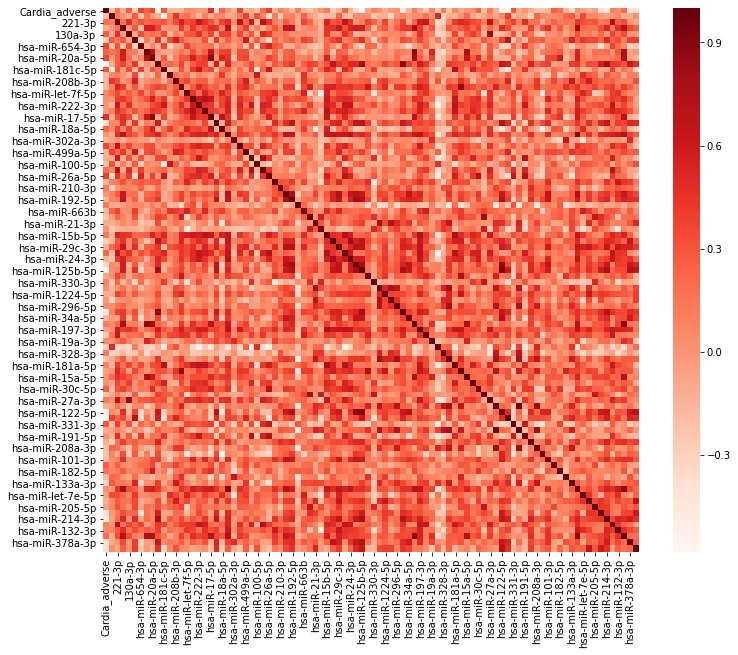

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor["Cardia_adverse"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Cardia_adverse     1.000000
hsa-miR-143-3p     0.555156
hsa-miR-125b-5p    0.558224
hsa-miR-1-3p       0.573201
Name: Cardia_adverse, dtype: float64

In [ ]:
"""As we can see, only the features hsa-miR-143-3p, 125b-5p and 1-3p are highly correlated with the output Cardia_ad. 
Hence we will drop all other features apart from these. However this is not the end of the process. 
One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. 
If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 
So let us check the correlation of selected features with each other. 
This can be done either by visually checking it from the above correlation matrix or from the code snippet below."""

In [23]:
# print(data[["hsa-miR-143-3p","hsa-miR-125b-5p"]].corr())
# print(data[["hsa-miR-125b-5p","hsa-miR-1-3p"]].corr())
# print(data[["hsa-miR-143-3p","hsa-miR-1-3p"]].corr())

                 hsa-miR-143-3p  hsa-miR-125b-5p
hsa-miR-143-3p         1.000000         0.793866
hsa-miR-125b-5p        0.793866         1.000000
                 hsa-miR-125b-5p  hsa-miR-1-3p
hsa-miR-125b-5p         1.000000      0.628385
hsa-miR-1-3p            0.628385      1.000000
                hsa-miR-143-3p  hsa-miR-1-3p
hsa-miR-143-3p        1.000000      0.566385
hsa-miR-1-3p          0.566385      1.000000


In [26]:
## 3 - Embedded method (LASSO)

In [27]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.463937
Best score using built-in LassoCV: 0.201576


C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006759870245620428, tolerance: 0.0006300000000000001
  positive)
C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005997451129650111, tolerance: 0.0005419354838709678
  positive)


In [28]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 88 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

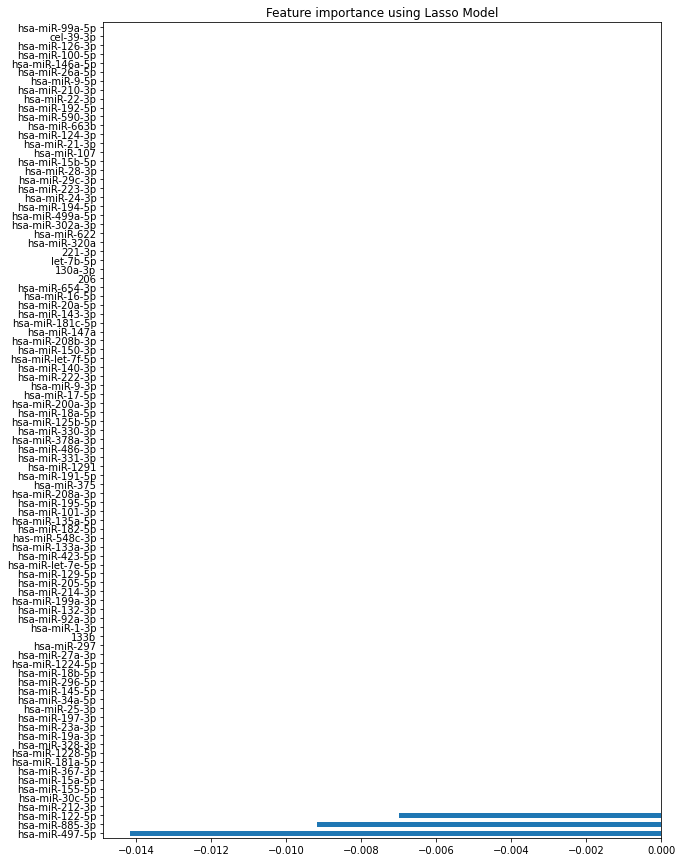

In [31]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
# Ref :https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [33]:
########## Data visualisation - PCA

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [72]:
from sklearn.preprocessing import StandardScaler

# creat the object
scaler = StandardScaler()

# Calculate the mean and the standard deviation
scaler.fit(X)
X_scaled = scaler.transform(X)

In [73]:
pca_30 = PCA(n_components=30, random_state = 24)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [74]:
print("Variance explained by all 10 principal components = ",
     sum(pca_30.explained_variance_ratio_ * 100))

Variance explained by all 10 principal components =  98.67943794607937


In [75]:
pca_30.explained_variance_ratio_ * 100

array([23.7237349 , 13.28617933,  8.0042876 ,  6.36683761,  5.80530564,
        5.42463666,  4.57381599,  3.71971733,  3.16441524,  2.61549496,
        2.52546568,  2.38325879,  2.18470741,  1.86959271,  1.58243959,
        1.43213638,  1.30711094,  1.30054234,  0.97498633,  0.95468823,
        0.83513536,  0.72975748,  0.67323249,  0.63569995,  0.57337165,
        0.53307777,  0.41717316,  0.39682851,  0.34498886,  0.34081908])

In [76]:
np.cumsum(pca_30.explained_variance_ratio_ * 100)  # Variance explained by the first 3 principal components = 45.01% 

array([23.7237349 , 37.00991423, 45.01420182, 51.38103943, 57.18634507,
       62.61098173, 67.18479771, 70.90451504, 74.06893029, 76.68442525,
       79.20989093, 81.59314972, 83.77785713, 85.64744984, 87.22988943,
       88.66202581, 89.96913675, 91.26967909, 92.24466542, 93.19935365,
       94.034489  , 94.76424649, 95.43747897, 96.07317892, 96.64655056,
       97.17962834, 97.5968015 , 97.99363001, 98.33861887, 98.67943795])

In [77]:
X_reduced = PCA(n_components=3).fit_transform(X)

In [82]:
plt.style.use('ggplot')

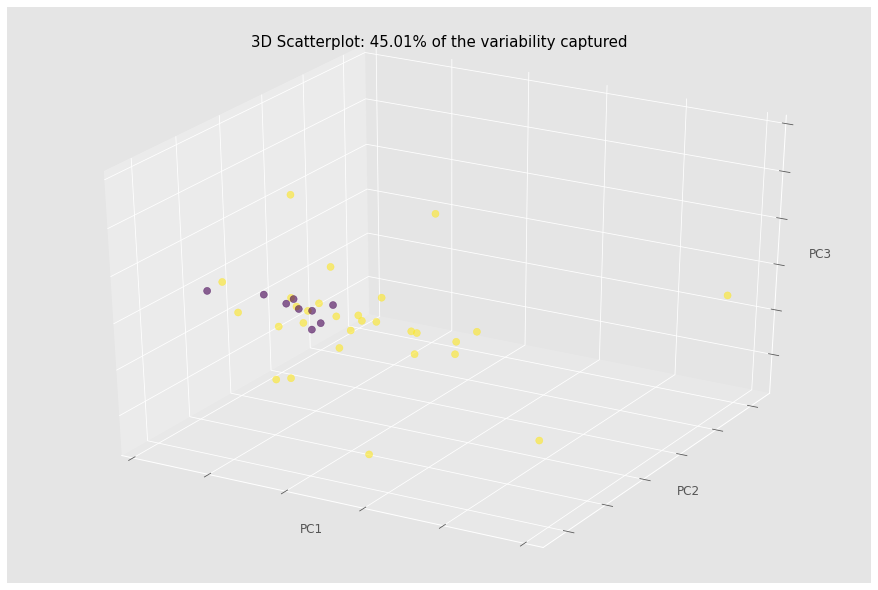

In [83]:
fig = plt.figure(figsize = (12,8))
axes = Axes3D(fig)
axes.set_title('3D Scatterplot: 45.01% of the variability captured', size=15)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c = y, s=50, alpha=0.6)

In [84]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Third principal component')

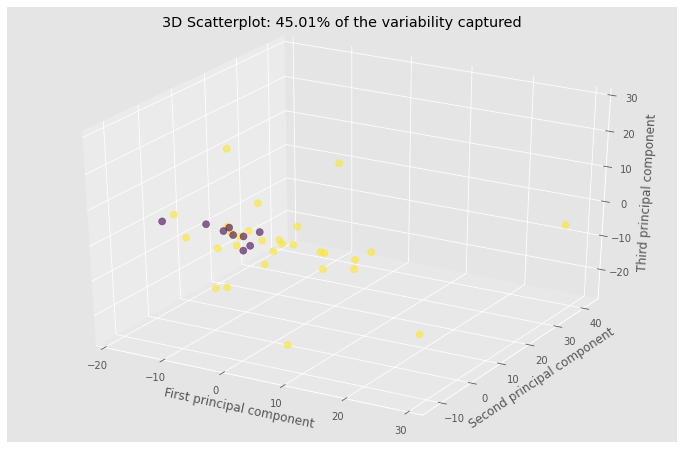

In [87]:
fig2 = plt.figure(figsize = (12,8))
ax2 = plt.axes(projection='3d')
sctt = ax2.scatter3D(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2], c = y, s=50, alpha=0.6)

plt.title("3D Scatterplot: 45.01% of the variability captured", pad=15)
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax2.set_zlabel('Third principal component')

In [ ]:
# Ref: https://www.asquero.com/article/principal-component-analysis-scikit-learn-implementation/